In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df= pd.read_csv("C:/Users/saswa/saswata/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv", header=0)

In [42]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [43]:
df= pd.get_dummies(df, columns=['Position'], drop_first=True)

In [44]:
df.describe()

,Level,Salary,Position_C-level,Position_CEO,Position_Country Manager,Position_Junior Consultant,Position_Manager,Position_Partner,Position_Region Manager,Position_Senior Consultant,Position_Senior Partner
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,249500.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
std,3.02765,299373.883668,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228
min,1.00000,45000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.25000,65000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.50000,130000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.75000,275000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.00000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler= StandardScaler()

In [46]:
df.iloc[:, 0:2]= scaler.fit_transform(df.iloc[:, 0:2])

In [47]:
df.describe()

,Level,Salary,Position_C-level,Position_CEO,Position_Country Manager,Position_Junior Consultant,Position_Manager,Position_Partner,Position_Region Manager,Position_Senior Consultant,Position_Senior Partner
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-6.661338e-17,-4.440892e-17,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
std,1.054093e+00,1.054093e+00,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228
min,-1.566699e+00,-7.200425e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.833495e-01,-6.496227e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,-4.207583e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.833495e-01,8.978525e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.566699e+00,2.642503e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.model_selection import train_test_split
x= df.iloc[:, df.columns!='Salary']
y= df['Salary']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=True)

In [49]:
from sklearn.linear_model import LinearRegression
poly_reg= PolynomialFeatures(degree=2)

In [61]:
x_train_poly= poly_reg.fit_transform(x_train)
x_test_poly= poly_reg.fit_transform(x_test)
x_poly= poly_reg.fit_transform(x)

In [62]:
lr_poly= LinearRegression()

In [63]:
lr_poly.fit(x_train_poly, y_train)

LinearRegression()

Text(0, 0.5, 'Salary')

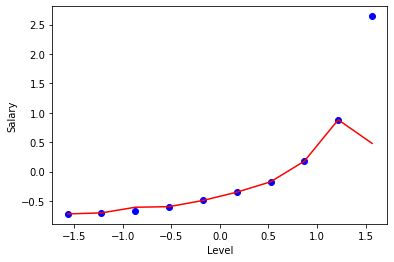

In [67]:
plt.scatter(x.iloc[:, 0],y, color='blue')
plt.plot(x.iloc[:, 0], lr_poly.predict(x_poly), color='red')
plt.xlabel('Level')
plt.ylabel('Salary')

In [68]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y, lr_poly.predict(x_poly))

0.5320768775455353

In [69]:
mean_squared_error(y, lr_poly.predict(x_poly))

0.4679231224544645